In [2]:
# import first all required dependencies for the project
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

   

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e7de9686e5e94953921fa947b0e00469 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='66EM8OjjlOqEY0SAXFe2NGVie0jEX8k-7PQlyS_SWV0n',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e7de9686e5e94953921fa947b0e00469.get_object(Bucket='ibmcapstonefinal-donotdelete-pr-zt6h5mlapmxyag',Key='mumbai.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_mumbai = pd.read_csv(body)
df_mumbai.head()



Postcode District               Area  Taluka PostalStatus
0    400001   Mumbai         Bazargate   Mumbai   Sub Office
1    400001   Mumbai             M P T   Mumbai   Sub Office
2    400001   Mumbai    Stock Exchange   Mumbai   Sub Office
3    400001   Mumbai          Tajmahal   Mumbai   Sub Office
4    400001   Mumbai  Town Hall Mumbai   Mumbai   Sub Office

In [4]:

!pip install geocoder
!conda install -c conda-forge folium=0.5.0 --yes

    100% |████████████████████████████████| 102kB 14.2MB/s a 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
Solving environment: done

# All requested packages already installed.



In [5]:

import geocoder
import json
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [6]:
df_mumbai['Latitude'] = 1.0
df_mumbai['Longitude'] = 1.0

df_mumbai.head()

Postcode District               Area  Taluka PostalStatus  Latitude  \
0    400001   Mumbai         Bazargate   Mumbai   Sub Office       1.0   
1    400001   Mumbai             M P T   Mumbai   Sub Office       1.0   
2    400001   Mumbai    Stock Exchange   Mumbai   Sub Office       1.0   
3    400001   Mumbai          Tajmahal   Mumbai   Sub Office       1.0   
4    400001   Mumbai  Town Hall Mumbai   Mumbai   Sub Office       1.0   

   Longitude  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0

In [10]:
for index, row in df_mumbai.iterrows():
    g = geocoder.arcgis('{}, India'.format(row.Postcode))
    lat_lng_coords = g.latlng
    df_mumbai.at[index,'Latitude'] =lat_lng_coords[0]
    df_mumbai.at[index,'Longitude'] =lat_lng_coords[1]

In [11]:
df_mumbai

Postcode District                         Area             Taluka  \
0      400001   Mumbai                   Bazargate              Mumbai   
1      400001   Mumbai                       M P T              Mumbai   
2      400001   Mumbai              Stock Exchange              Mumbai   
3      400001   Mumbai                    Tajmahal              Mumbai   
4      400001   Mumbai            Town Hall Mumbai              Mumbai   
5      400001   Mumbai                Mumbai G P O              Mumbai   
6      400002   Mumbai                   Kalbadevi              Mumbai   
7      400002   Mumbai                     Ramwadi              Mumbai   
8      400002   Mumbai                   S C Court              Mumbai   
9      400002   Mumbai                  Thakurdwar              Mumbai   
10     400003   Mumbai                    B P Lane         Mumbai East   
11     400003   Mumbai               Mandvi Mumbai         Mumbai East   
12     400003   Mumbai                      Masjid         Mumbai East   
13     400003   Mumbai                  Null Bazar         Mumbai East   
14     400004   Mumbai             Ambewadi Mumbai              Mumbai   
15     400004   Mumbai                 Charni Road              Mumbai   
16     400004   Mumbai                    Chaupati              Mumbai   
17     400004   Mumbai                     Girgaon              Mumbai   
18     400004   Mumbai                  Madhavbaug              Mumbai   
19     400004   Mumbai                 Opera House              Mumbai   
20     400005   Mumbai                      Asvini              Mumbai   
21     400005   Mumbai                Colaba Bazar        Mumbai South   
22     400005   Mumbai                      Colaba              Mumbai   
23     400005   Mumbai                Holiday Camp              Mumbai   
24     400005   Mumbai                     V W T C              Mumbai   
25     400006   Mumbai                Malabar Hill              Mumbai   
26     400007   Mumbai         Bharat Nagar Mumbai              Mumbai   
27     400007   Mumbai                  Grant Road              Mumbai   
28     400007   Mumbai             N S Patkar Marg              Mumbai   
29     400007   Mumbai                    S V Marg              Mumbai   
30     400007   Mumbai                      Tardeo              Mumbai   
31     400008   Mumbai               Falkland Road              Mumbai   
32     400008   Mumbai                J J Hospital              Mumbai   
33     400008   Mumbai                 Kamathipura              Mumbai   
34     400008   Mumbai                    M A Marg              Mumbai   
35     400008   Mumbai              Mumbai Central              Mumbai   
36     400009   Mumbai                Chinchbunder         Mumbai East   
37     400009   Mumbai                   Noor Baug         Mumbai East   
38     400009   Mumbai               Princess Dock              Mumbai   
39     400010   Mumbai               Dockyard Road              Mumbai   
40     400010   Mumbai                Mazgaon Dock              Mumbai   
41     400010   Mumbai                Mazgaon Road              Mumbai   
42     400010   Mumbai                     Mazgaon              Mumbai   
43     400010   Mumbai                  V K Bhavan              Mumbai   
44     400011   Mumbai                    Agripada              Mumbai   
45     400011   Mumbai            Bpc Jacob Circle              Mumbai   
46     400011   Mumbai                 Chinchpokli              Mumbai   
47     400011   Mumbai                 Haines Road              Mumbai   
48     400011   Mumbai                Jacob Circle              Mumbai   
49     400012   Mumbai         Best Staff Quarters         Mumbai East   
50     400012   Mumbai                  Chamarbaug              Mumbai   
51     400012   Mumbai           Haffkin Institute              Mumbai   
52     400012   Mumbai                    Lal Baug              Mumbai   
53     40

In [25]:
df_mumbai.to_csv('mumbaidata.csv')


In [45]:
df_mumbai

Postcode District                         Area             Taluka  \
0      400001   Mumbai                   Bazargate              Mumbai   
1      400001   Mumbai                       M P T              Mumbai   
2      400001   Mumbai              Stock Exchange              Mumbai   
3      400001   Mumbai                    Tajmahal              Mumbai   
4      400001   Mumbai            Town Hall Mumbai              Mumbai   
5      400001   Mumbai                Mumbai G P O              Mumbai   
6      400002   Mumbai                   Kalbadevi              Mumbai   
7      400002   Mumbai                     Ramwadi              Mumbai   
8      400002   Mumbai                   S C Court              Mumbai   
9      400002   Mumbai                  Thakurdwar              Mumbai   
10     400003   Mumbai                    B P Lane         Mumbai East   
11     400003   Mumbai               Mandvi Mumbai         Mumbai East   
12     400003   Mumbai                      Masjid         Mumbai East   
13     400003   Mumbai                  Null Bazar         Mumbai East   
14     400004   Mumbai             Ambewadi Mumbai              Mumbai   
15     400004   Mumbai                 Charni Road              Mumbai   
16     400004   Mumbai                    Chaupati              Mumbai   
17     400004   Mumbai                     Girgaon              Mumbai   
18     400004   Mumbai                  Madhavbaug              Mumbai   
19     400004   Mumbai                 Opera House              Mumbai   
20     400005   Mumbai                      Asvini              Mumbai   
21     400005   Mumbai                Colaba Bazar        Mumbai South   
22     400005   Mumbai                      Colaba              Mumbai   
23     400005   Mumbai                Holiday Camp              Mumbai   
24     400005   Mumbai                     V W T C              Mumbai   
25     400006   Mumbai                Malabar Hill              Mumbai   
26     400007   Mumbai         Bharat Nagar Mumbai              Mumbai   
27     400007   Mumbai                  Grant Road              Mumbai   
28     400007   Mumbai             N S Patkar Marg              Mumbai   
29     400007   Mumbai                    S V Marg              Mumbai   
30     400007   Mumbai                      Tardeo              Mumbai   
31     400008   Mumbai               Falkland Road              Mumbai   
32     400008   Mumbai                J J Hospital              Mumbai   
33     400008   Mumbai                 Kamathipura              Mumbai   
34     400008   Mumbai                    M A Marg              Mumbai   
35     400008   Mumbai              Mumbai Central              Mumbai   
36     400009   Mumbai                Chinchbunder         Mumbai East   
37     400009   Mumbai                   Noor Baug         Mumbai East   
38     400009   Mumbai               Princess Dock              Mumbai   
39     400010   Mumbai               Dockyard Road              Mumbai   
40     400010   Mumbai                Mazgaon Dock              Mumbai   
41     400010   Mumbai                Mazgaon Road              Mumbai   
42     400010   Mumbai                     Mazgaon              Mumbai   
43     400010   Mumbai                  V K Bhavan              Mumbai   
44     400011   Mumbai                    Agripada              Mumbai   
45     400011   Mumbai            Bpc Jacob Circle              Mumbai   
46     400011   Mumbai                 Chinchpokli              Mumbai   
47     400011   Mumbai                 Haines Road              Mumbai   
48     400011   Mumbai                Jacob Circle              Mumbai   
49     400012   Mumbai         Best Staff Quarters         Mumbai East   
50     400012   Mumbai                  Chamarbaug              Mumbai   
51     400012   Mumbai           Haffkin Institute              Mumbai   
52     400012   Mumbai                    Lal Baug              Mumbai   
53     40

In [39]:
from geopy.geocoders import Nominatim
import folium
address = 'Mumbai, India'
geolocator = Nominatim(user_agent='my-application')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
# create map of Mumbai using latitude and longitude values
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=13)
# add markers to map
for lat, lng, borough, neighborhood in zip(df_mumbai['Latitude'], df_mumbai['Longitude'], df_mumbai['District'], df_mumbai['Area']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mumbai)  
map_mumbai

In [40]:
print('The dataframe has {} Taluka and {} Area.'.format(
        len(df_mumbai['Taluka'].unique()),
        df_mumbai.shape[0]
    )
)

The dataframe has 17 Taluka and 242 Area.


In [106]:
df_mumbai.groupby('Taluka').count()

Postcode  District  Area  PostalStatus  Latitude  Longitude
Taluka                                                                        
Bandra                    1         1     1             1         1          1
Borivali East             5         5     5             5         5          5
Borivali West             3         3     3             3         3          3
Dahisar East              2         2     2             2         2          2
Dahisar West              1         1     1             1         1          1
Goregaon East             4         4     4             4         4          4
Goregaon West             4         4     4             4         4          4
Jogeshwari East           2         2     2             2         2          2
Jogeshwari West           2         2     2             2         2          2
Kandivali East            4         4     4             4         4          4
Kandivali West            2         2     2             2         2          2
Malad East                2         2     2             2         2          2
Malad West                6         6     6             6         6          6
Mumbai                  146       146   146           146       146        146
Mumbai East              10        10    10            10        10         10
Mumbai North East        47        47    47            47        47         47
Mumbai South              1         1     1             1         1          1

to use Foursquare, credentials for foursquare are defined

In [16]:
CLIENT_ID = 'WT3ZB3MYCPKTZJJPN1DFDMVNHKFC4XU0C5GH4QN45KS443LD' # your Foursquare ID
CLIENT_SECRET = 'WNSYU3DXBLTT12SEOQDIWGV2ELCYEKV3ALTAGD5XUBEO5UPS' # your Foursquare Secret
VERSION = '20191606' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WT3ZB3MYCPKTZJJPN1DFDMVNHKFC4XU0C5GH4QN45KS443LD
CLIENT_SECRET:WNSYU3DXBLTT12SEOQDIWGV2ELCYEKV3ALTAGD5XUBEO5UPS


now in foursquare ı will define sanitaryware venues function for business

In [58]:
def getNearbysanitaryVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            'sanitary bathroom ',
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results if v['categories']])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [59]:
sanitary_venues = getNearbysanitaryVenues(df_mumbai['Area'],df_mumbai["Latitude"],df_mumbai['Longitude'],2000)
sanitary_venues.head()

Area  Area Latitude  Area Longitude                 Venue  \
0    Dadar Colony       19.014497       72.847075  Darshan Sanitaryware   
1           Dadar       19.014497       72.847075  Darshan Sanitaryware   
2  Naigaon Mumbai       19.014497       72.847075  Darshan Sanitaryware   
3     Kapad Bazar       19.037595       72.842223  Darshan Sanitaryware   
4     Mahim Bazar       19.037595       72.842223  Darshan Sanitaryware   

   Venue Latitude  Venue Longitude Venue Category  
0       19.031814        72.841996         Office  
1       19.031814        72.841996         Office  
2       19.031814        72.841996         Office  
3       19.031814        72.841996         Office  
4       19.031814        72.841996         Office

In [110]:
sanitary_venues.groupby('Area').count()

Area Latitude  Area Longitude  Venue  \
Area                                                             
Andheri                               2               2      2   
Andheri Railway Station               1               1      1   
Azad Nagar Mumbai                     2               2      2   
Bangur Nagar                          1               1      1   
Bhawani Shankar                       1               1      1   
Bhawani Shankar Rd                    1               1      1   
Borivali West                         1               1      1   
Dadar                                 1               1      1   
Dadar Colony                          1               1      1   
Dharavi                               1               1      1   
Dharavi Road                          1               1      1   
Gokhale Road Mumbai                   1               1      1   
Goregaon Mumbai                       1               1      1   
Goregaon Rs                           1               1      1   
H M P School                          1               1      1   
Jogeshwari West                       2               2      2   
Kapad Bazar                           1               1      1   
Mahim                                 1               1      1   
Mahim Bazar                           1               1      1   
Mahim East                            1               1      1   
Mandapeshwar                          1               1      1   
Matunga                               1               1      1   
Mori Road                             1               1      1   
Motilal Nagar                         1               1      1   
Naigaon Mumbai                        1               1      1   
Oshiwara                              2               2      2   
Ranade Road                           1               1      1   
S V S Marg                            1               1      1   
Shivaji Park Mumbai                   1               1      1   

                          Venue Latitude  Venue Longitude  Venue Category  \
Area                                                                        
Andheri                                2                2               2   
Andheri Railway Station                1                1               1   
Azad Nagar Mumbai                      2                2               2   
Bangur Nagar                           1                1               1   
Bhawani Shankar                        1                1               1   
Bhawani Shankar Rd                     1                1               1   
Borivali West                          1                1               1   
Dadar                                  1                1               1   
Dadar Colony                           1                1               1   
Dharavi                                1                1               1   
Dharavi Road                           1                1               1   
Gokhale Road Mumbai                    1                1               1   
Goregaon Mumbai                        1                1               1   
Goregaon Rs                            1                1               1   
H M P School                           1                1               1   
Jogeshwari West                        2                2               2   
Kapad Bazar                            1                1               1   
Mahim                                  1                1               1   
Mahim Bazar                            1                1               1   
Mahim East                             1                1               1   
Mandapeshwar                           1                1               1   
Matunga                                1                1               1   
Mori Road                              1                1               1   
Motilal Nagar                          1              

In [109]:


sanitary_venues.shape

(33, 8)

In [60]:
def getNearbyhotelVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            'hotel hostel ',
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results if v['categories']])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [80]:
#narrow down hotel area
mumbai_taluka = df_mumbai[df_mumbai['Taluka']=='Mumbai'].reset_index(drop=True)

hotel_venues = getNearbyhotelVenues(df_mumbai['Area'],df_mumbai["Latitude"],df_mumbai['Longitude'],2000)
hotel_venues.head()




Area  Area Latitude  Area Longitude                  Venue  \
0  Bazargate       18.938919        72.83747    Hotel Landmark Fort   
1  Bazargate       18.938919        72.83747           hotel kalapi   
2  Bazargate       18.938919        72.83747  Hotel Traveller’s Inn   
3  Bazargate       18.938919        72.83747  Hotel Landmark Annexe   
4  Bazargate       18.938919        72.83747          Hotel Windsor   

   Venue Latitude  Venue Longitude   Venue Category  
0       18.938528        72.837998  Bed & Breakfast  
1       18.938184        72.837802            Motel  
2       18.936039        72.838000  Bed & Breakfast  
3       18.938030        72.838844            Hotel  
4       18.936808        72.838327           Hostel

In [62]:
# define API request URL for exploring

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [63]:
mumbai_venues = getNearbyVenues(names=df_mumbai['Area'],
                                   latitudes=df_mumbai['Latitude'],
                                   longitudes=df_mumbai['Longitude']
                                  )
mumbai_venues.head()

Bazargate 
M P T 
Stock Exchange 
Tajmahal 
Town Hall Mumbai 
Mumbai G P O 
Kalbadevi 
Ramwadi 
S C Court 
Thakurdwar 
B P Lane 
Mandvi Mumbai 
Masjid 
Null Bazar 
Ambewadi Mumbai 
Charni Road 
Chaupati 
Girgaon 
Madhavbaug 
Opera House 
Asvini 
Colaba Bazar 
Colaba 
Holiday Camp 
V W T C 
Malabar Hill 
Bharat Nagar Mumbai 
Grant Road 
N S Patkar Marg 
S V Marg 
Tardeo 
Falkland Road 
J J Hospital 
Kamathipura 
M A Marg 
Mumbai Central 
Chinchbunder 
Noor Baug 
Princess Dock 
Dockyard Road 
Mazgaon Dock 
Mazgaon Road 
Mazgaon 
V K Bhavan 
Agripada 
Bpc Jacob Circle 
Chinchpokli 
Haines Road 
Jacob Circle 
Best Staff Quarters 
Chamarbaug 
Haffkin Institute 
Lal Baug 
Parel Naka 
Parel Rly Work Shop 
Parel 
Delisle Road 
Dadar Colony 
Dadar 
Naigaon Mumbai 
Sewri 
Kapad Bazar 
Mahim Bazar 
Mahim East 
Mahim 
Mori Road 
Dharavi Road 
Dharavi 
Worli Naka 
Worli 
Matunga 
Central Building 
Churchgate 
Marine Lines 
Nariman Point 
New Yogakshema 
Chunabhatti 
Raoli Camp 
Sion 
Transit Camp 


Area  Area Latitude  Area Longitude                    Venue  \
0  Bazargate       18.938919        72.83747              Royal China   
1  Bazargate       18.938919        72.83747            Sher-E-Punjab   
2  Bazargate       18.938919        72.83747          Britannia & Co.   
3  Bazargate       18.938919        72.83747          Town House Cafe   
4  Bazargate       18.938919        72.83747  Dakshin Bar And Kitchen   

   Venue Latitude  Venue Longitude      Venue Category  
0       18.938715        72.832933  Chinese Restaurant  
1       18.937944        72.837853   Indian Restaurant  
2       18.934683        72.840183    Parsi Restaurant  
3       18.938550        72.833464                 Bar  
4       18.936489        72.837490  Seafood Restaurant

In [83]:
# I assume mumbai townhall as city center define coordinates accordingly

mumbai_latitude = 19.228825
mumbai_longitude = 72.854118

# create map
map_clusters = folium.Map(location=[mumbai_latitude, mumbai_longitude], zoom_start=12)

# add markers to the map

markers_colors = []
for lat, lon, poi in zip(sanitary_venues['Venue Latitude'], sanitary_venues['Venue Longitude'], sanitary_venues['Venue']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)
    

       
map_clusters

In [84]:
sanitary_feature = sanitary_venues[['Venue Latitude','Venue Longitude']]
hotel_feature = hotel_venues[['Venue Latitude','Venue Longitude']]

In [85]:
from sklearn.preprocessing import MinMaxScaler
sanitary_data = sanitary_feature.values 
hotel_data = hotel_feature.values
min_max_scaler = MinMaxScaler()
sanitary_mtx = min_max_scaler.fit_transform(sanitary_data)
hotel_mtx = min_max_scaler.fit_transform(hotel_data)
sanitary_mtx [0:5]

array([[ 0.        ,  0.68680553],
       [ 0.        ,  0.68680553],
       [ 0.        ,  0.68680553],
       [ 0.        ,  0.68680553],
       [ 0.        ,  0.68680553]])

In [86]:

import scipy
sanitary_leng = sanitary_mtx.shape[0]
sanitary_D = scipy.zeros([sanitary_leng,sanitary_leng])
for i in range(sanitary_leng):
    for j in range(sanitary_leng):
        sanitary_D[i,j] = scipy.spatial.distance.euclidean(sanitary_mtx[i], sanitary_mtx[j])
        
print(sanitary_D)

[[ 0.          0.          0.         ...,  0.90156382  0.90156382
   0.90156382]
 [ 0.          0.          0.         ...,  0.90156382  0.90156382
   0.90156382]
 [ 0.          0.          0.         ...,  0.90156382  0.90156382
   0.90156382]
 ..., 
 [ 0.90156382  0.90156382  0.90156382 ...,  0.          0.          0.        ]
 [ 0.90156382  0.90156382  0.90156382 ...,  0.          0.          0.        ]
 [ 0.90156382  0.90156382  0.90156382 ...,  0.          0.          0.        ]]


in order to find best place for sanitary business I perform clustering

In [87]:
# Import libraries
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
import pylab
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster

# Perform clustering
sanitary_Z = hierarchy.linkage(sanitary_D, 'complete')
max_d = 3
sanitary_clusters = fcluster(sanitary_Z, max_d, criterion='distance')
sanitary_dend = hierarchy.dendrogram(sanitary_Z)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


In [88]:
hotel_leng = hotel_mtx.shape[0]
hotel_D = scipy.zeros([hotel_leng,hotel_leng])
for i in range(hotel_leng):
    for j in range(hotel_leng):
        hotel_D[i,j] = scipy.spatial.distance.euclidean(hotel_mtx[i], hotel_mtx[j])
        
print(hotel_D)

[[ 0.          0.0018619   0.00792004 ...,  0.58116499  0.51323602
   0.55208447]
 [ 0.0018619   0.          0.00699303 ...,  0.58269323  0.51463595
   0.55345358]
 [ 0.00792004  0.00699303  0.         ...,  0.58864945  0.52096247
   0.5598511 ]
 ..., 
 [ 0.58116499  0.58269323  0.58864945 ...,  0.          0.09145196
   0.08274826]
 [ 0.51323602  0.51463595  0.52096247 ...,  0.09145196  0.          0.04101327]
 [ 0.55208447  0.55345358  0.5598511  ...,  0.08274826  0.04101327  0.        ]]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  from ipykernel import kernelapp as app


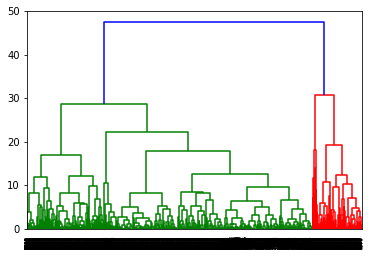

In [89]:
# Perform clustering
hotel_Z = hierarchy.linkage(hotel_D, 'complete')
max_d = 3
hotel_clusters = fcluster(hotel_Z, max_d, criterion='distance')
hotel_dend = hierarchy.dendrogram(hotel_Z)

In [90]:
sanitary_venues['cluster_'] = sanitary_clusters
hotel_venues['cluster_'] = hotel_clusters

In [91]:
# create map
map_clusters = folium.Map(location=[mumbai_latitude, mumbai_longitude], zoom_start=12)

# set color scheme for the laundromat clusters
sanitary_kclusters = sanitary_clusters.max()
x = np.arange(sanitary_kclusters)
ys = [i+x+(i*x)**2 for i in range(sanitary_kclusters)]
colors_array = cm.rainbow(np.linspace(0.8, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sanitary_venues['Venue Latitude'], sanitary_venues['Venue Longitude'], sanitary_venues['Venue'], sanitary_venues['cluster_']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
# set color scheme for the hotel clusters
hotel_kclusters = hotel_clusters.max()
x = np.arange(hotel_kclusters)
ys = [i+x+(i*x)**2 for i in range(hotel_kclusters)]
colors_array = cm.rainbow(np.linspace(0.1, 0.3, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hotel_venues['Venue Latitude'], hotel_venues['Venue Longitude'], hotel_venues['Venue'], hotel_venues['cluster_']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [99]:
# here I extract the coordinates of the center of the cluster in Mumbai for visualization of hotsplace for both businesses
sanitary_mean = pd.DataFrame(columns=['Venue Latitude','Venue Longitude'])
sanitary_count = pd.DataFrame(columns=['Number of Venues'])
hotel_mean = pd.DataFrame(columns=['Venue Latitude','Venue Longitude'])
hotel_count = pd.DataFrame(columns=['Number of Venues'])

for i in range(1,sanitary_kclusters+1):
    sanitary_mean.loc[i-1,:]=sanitary_venues[sanitary_venues['cluster_']==i][['Venue Latitude','Venue Longitude']].mean()
    sanitary_count.loc[i-1] = sanitary_venues[sanitary_venues['cluster_']==i]['cluster_'].count()

for i in range(1,hotel_kclusters+1):
    hotel_mean.loc[i-1,:]=hotel_venues[hotel_venues['cluster_']==i][['Venue Latitude','Venue Longitude']].mean()
    hotel_count.loc[i-1] = hotel_venues[hotel_venues['cluster_']==i]['cluster_'].count()
    
sanitary_mean = pd.concat([sanitary_mean, sanitary_count], axis=1 )
hotel_mean = pd.concat([hotel_mean, hotel_count], axis=1)
print('sanitary clusters: \n',sanitary_mean)
print('Hotel clusters: \n',hotel_mean)

sanitary clusters: 
   Venue Latitude Venue Longitude Number of Venues
0        19.0318          72.842               17
1        19.2287         72.8481                2
2        19.1423           72.83               14
Hotel clusters: 
    Venue Latitude Venue Longitude Number of Venues
0         19.0991         72.8452               43
1         19.0967         72.8523              125
2          19.096         72.8274               61
3         19.1086         72.8254               35
4         19.1107         72.8378               28
5         19.0412         72.8616               29
6         19.0402         72.8665               38
7         19.0591         72.8729               14
8         19.0772         72.8698               21
9         19.0743         72.8599               48
10        19.0576         72.8672               13
11        19.0693         72.8665               73
12        19.0668         72.8287               30
13        19.0553         72.8365              

In [101]:
# finally generating map for cluster for both sanitary business and hotels and larger the circle is larger the concentration
# blue is for hotels and red is for sanitary
# create map
map_center_clusters = folium.Map(location=[mumbai_latitude, mumbai_longitude], zoom_start=12)

# set color scheme for the laundromat clusters
sanitary_kclusters = sanitary_clusters.max()
x = np.arange(sanitary_kclusters)
ys = [i+x+(i*x)**2 for i in range(sanitary_kclusters)]
colors_array = cm.rainbow(np.linspace(0.8, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
scale_sanitary = sanitary_mean['Number of Venues'].max()
for lat, lon, clustsize, clustnum in zip(sanitary_mean['Venue Latitude'], sanitary_mean['Venue Longitude'], sanitary_mean['Number of Venues'],sanitary_mean.index):
    label = folium.Popup(' sanitary Cluster ' + str(clustnum+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=clustsize/scale_sanitary*30,
        popup=label,
        color=rainbow[clustnum],
        fill=True,
        fill_color=rainbow[clustnum],
        fill_opacity=0.7).add_to(map_center_clusters)
    
# set color scheme for the hotel clusters
hotel_kclusters = hotel_clusters.max()
x = np.arange(hotel_kclusters)
ys = [i+x+(i*x)**2 for i in range(hotel_kclusters)]
colors_array = cm.rainbow(np.linspace(0.1, 0.3, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
scale_hotel = hotel_mean['Number of Venues'].max()
for lat, lon, clustsize, clustnum in zip(hotel_mean['Venue Latitude'], hotel_mean['Venue Longitude'], hotel_mean['Number of Venues'], hotel_mean.index):
    label = folium.Popup(' Hotel Cluster ' + str(clustnum+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=clustsize/scale_hotel*30,
        popup=label,
        color=rainbow[clustnum],
        fill=True,
        fill_color=rainbow[clustnum],
        fill_opacity=0.7).add_to(map_center_clusters)
       
map_center_clusters

Matunga west area is the highest concentration for both business so recommendation is this area Matunga West.

In [102]:
# I check Top Turkish sanitaryware manufacturer location for India business and the location choice seems very good for this business expansion

def getNearbyvitraVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            'vitra ',
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results if v['categories']])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [103]:
vitra_venues = getNearbyvitraVenues(df_mumbai['Area'],df_mumbai["Latitude"],df_mumbai['Longitude'],2000)
vitra_venues.head()

Area  Area Latitude  Area Longitude        Venue  \
0    Dadar Colony       19.014497       72.847075  Vitra Store   
1           Dadar       19.014497       72.847075  Vitra Store   
2  Naigaon Mumbai       19.014497       72.847075  Vitra Store   
3     Kapad Bazar       19.037595       72.842223  Vitra Store   
4     Mahim Bazar       19.037595       72.842223  Vitra Store   

   Venue Latitude  Venue Longitude          Venue Category  
0       19.030577        72.837868  Furniture / Home Store  
1       19.030577        72.837868  Furniture / Home Store  
2       19.030577        72.837868  Furniture / Home Store  
3       19.030577        72.837868  Furniture / Home Store  
4       19.030577        72.837868  Furniture / Home Store

In [105]:
# finally generating map for cluster for both sanitary business and hotels and larger the circle is larger the concentration
# blue is for hotels and red is for sanitary
# yellow is Vitra locations - Vitra is concentrated in the areas where other sanitarware products sold and also hotel area.
# create map
map_center_clusters = folium.Map(location=[mumbai_latitude, mumbai_longitude], zoom_start=12)

# set color scheme for the laundromat clusters
sanitary_kclusters = sanitary_clusters.max()
x = np.arange(sanitary_kclusters)
ys = [i+x+(i*x)**2 for i in range(sanitary_kclusters)]
colors_array = cm.rainbow(np.linspace(0.8, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
scale_sanitary = sanitary_mean['Number of Venues'].max()
for lat, lon, clustsize, clustnum in zip(sanitary_mean['Venue Latitude'], sanitary_mean['Venue Longitude'], sanitary_mean['Number of Venues'],sanitary_mean.index):
    label = folium.Popup(' sanitary Cluster ' + str(clustnum+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=clustsize/scale_sanitary*30,
        popup=label,
        color=rainbow[clustnum],
        fill=True,
        fill_color=rainbow[clustnum],
        fill_opacity=0.7).add_to(map_center_clusters)
    
# set color scheme for the hotel clusters
hotel_kclusters = hotel_clusters.max()
x = np.arange(hotel_kclusters)
ys = [i+x+(i*x)**2 for i in range(hotel_kclusters)]
colors_array = cm.rainbow(np.linspace(0.1, 0.3, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
scale_hotel = hotel_mean['Number of Venues'].max()
for lat, lon, clustsize, clustnum in zip(hotel_mean['Venue Latitude'], hotel_mean['Venue Longitude'], hotel_mean['Number of Venues'], hotel_mean.index):
    label = folium.Popup(' Hotel Cluster ' + str(clustnum+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=clustsize/scale_hotel*30,
        popup=label,
        color=rainbow[clustnum],
        fill=True,
        fill_color=rainbow[clustnum],
        fill_opacity=0.7).add_to(map_center_clusters)
    
markers_colors = []
for lat, lon, poi in zip(vitra_venues['Venue Latitude'], vitra_venues['Venue Longitude'], vitra_venues['Venue']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7).add_to(map_center_clusters)
       
map_center_clusters